# Sensitivity Analysis
## Mahdiar Sadeghi
## Objective
This notebook is dedicated to understand how social distancing will effect the spread of an epidemic.
## Setup

In [2]:
using DifferentialEquations, Plots, Plots.PlotMeasures

## Utility functions

In [3]:
# change plot fonts
bplot(p, s) = plot!(p, titlefont=font(s, "Times"), xguidefontsize=s-4
    , ytickfont=font(s-4, "Times"), margin=8mm, yguidefontsize=s-4
    , xtickfont = font(s-4, "Times"), legendfont = font(s-4, "Times"))

# this function will generate a T period of social distancing at time t0
sinput(t, ts) = if t-ts<0 0 else 1 end

sinput (generic function with 1 method)

# $SIR$ Model

## Basics

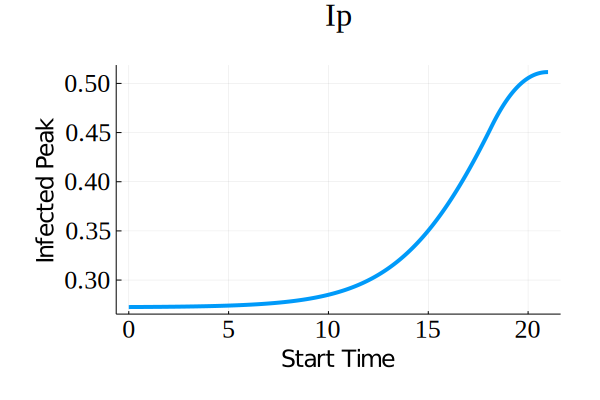

In [5]:
# model description
function SIR(dx,x,p,t)
    b, db, g, ts = p
    u = b - db.*sinput(t, ts)
    dx[1] = -u*x[1]*x[2]
    dx[2] = u*x[1]*x[2] - g*x[2]
    dx[3] = g*x[2]
end

beta  = 0.5
bdiff = 0.25
gamma = 0.09

# define initial values
u0 = [1-1e-3, 1e-3, 0.]
p  = [beta, bdiff, gamma, 0.]

# ode solver and time span
alg   = BS3()
tspan = (0.0, 50)

# resolution of numerical simulation
tsrng = 0::.01:21
tsval = zeros(3,size(tsrng,1))
infpk = zeros(size(tsrng,1))

# show something
for i = 1:size(tsrng,1)
    p[4] = tsrng[i]
    prob = ODEProblem(SIR, u0, tspan, p)
    sol  = solve(prob, alg, reltol=1e-8, abstol=1e-8)
    tsval[:,i] = sol(tsrng[i])
    infpk[i]  = maximum(sol[2,:])
end

p = plot(tsrng, infpk, linewidth=4, legend=:false, title="Ip", 
        xlabel="Start Time", ylabel="Infected Peak")
bplot(p,20)

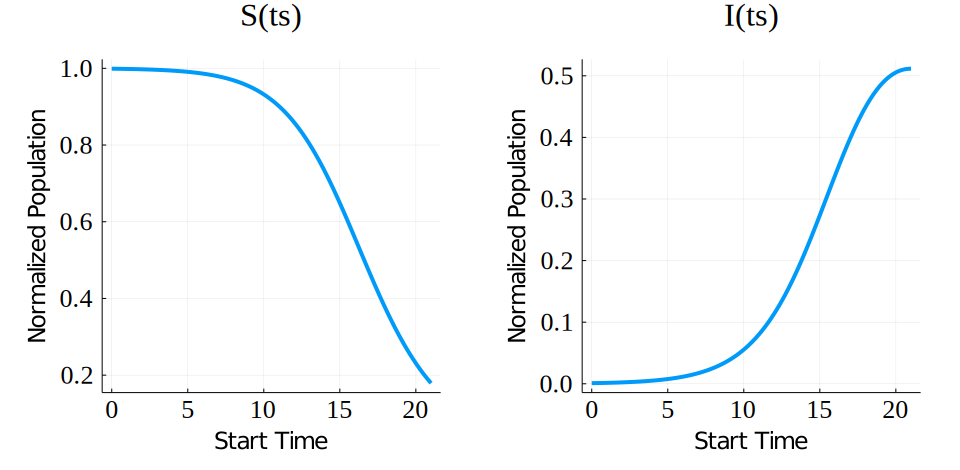

In [5]:
p1 = plot(tsrng, tsval[1,:], legend=:false, title="S(ts)", linewidth=4, 
        xlabel="Start Time", ylabel="Normalized Population")
p2 = plot(tsrng, tsval[2,:], legend=:false, title="I(ts)", linewidth=4, 
        xlabel="Start Time", ylabel="Normalized Population")
plot(bplot(p1, 20), bplot(p2, 20), layout=(1,2), size=(960,470))

## Differential Sensitivity

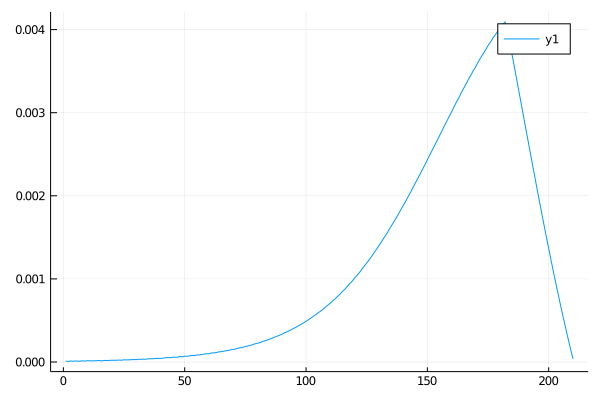

In [6]:
plot(diff(infpk))

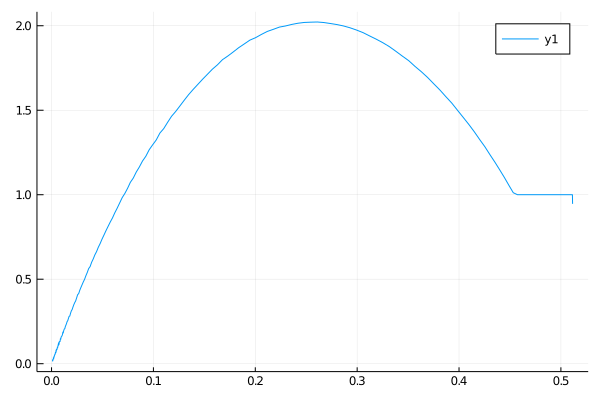

In [7]:
dsen = (tsval[2,1:end-1]./infpk[1:end-1]) .* (diff(tsval[2,:])./diff(infpk)) 

plot(tsval[2,1:end-1], dsen)

# Provenance

In [15]:
using Dates
Dates.format(now(), "Y/U/d HH:MM")  

"2020/June/21 18:26"